### Importing data

In [ ]:
import os
folder_path="/content/Dataset"
os.makedirs(folder_path,exist_ok=True)
print("Folder created at: ",folder_path)

Folder created at:  /content/Dataset


In [ ]:
import zipfile
zip_path="/content/SIH_Data_PS-08.zip"
extract_path="/content/Dataset"
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)
print("Unzipped into: ",zip_path)

Unzipped into:  /content/SIH_Data_PS-08.zip


In [ ]:
os.listdir(extract_path)

['SIH_Data_Discription.pdf',
 'DATA_GEO_Train.csv',
 'DATA_MEO_Train.csv',
 'DATA_MEO_Train2.csv']

### Creating Residuals

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Dataset/DATA_GEO_Train.csv')
df.head()

,utc_time,x_error (m),y_error (m),z_error (m),satclockerror (m)
0,9/1/2025 6:00,5.333443,4.530495,-2.600099,1.280427
1,9/1/2025 8:00,0.222901,0.177056,-0.008267,-3.609894
2,9/1/2025 10:00,0.542796,1.124622,6.286751,-0.419839
3,9/1/2025 12:00,0.164464,0.013855,0.007338,-0.318279
4,9/1/2025 14:00,-0.838448,-0.667825,0.676121,1.428765


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Dataset/DATA_GEO_Train.csv')
df['residual']=np.sqrt(df['x_error (m)']**2 + df['y_error (m)']**2 + df['z_error (m)']**2 + df['satclockerror (m)']**2)
df.to_csv('/content/Dataset/GEOwithResiduals.csv',index=False)
df1=pd.read_csv('/content/Dataset/DATA_MEO_Train.csv')
df1.rename(columns={'y_error  (m)': "y_error (m)"},inplace=True)
df1['residual']=np.sqrt(df1['x_error (m)']**2 +df1['y_error (m)']**2 +df1['z_error (m)']**2+df1['satclockerror (m)']**2)
df1.to_csv('/content/Dataset/MEOwithResiduals.csv',index=False)
df2=pd.read_csv('/content/Dataset/DATA_MEO_Train2.csv')
df2['residual']=np.sqrt(df2['x_error (m)']**2 + df2['y_error (m)']**2 + df2['z_error (m)']**2 + df2['satclockerror (m)']**2)
df2.to_csv('/content/Dataset/MEO2withResiduals.csv',index=False)

### Curious to know the reason for presence of 2 files for MEO Orbit's data

Checking overlaps

In [ ]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
files=['/content/Dataset/DATA_MEO_Train.csv','/content/Dataset/DATA_MEO_Train2.csv']
for f in files:
  print("File: ",f,"Size in MB: ",os.path.getsize(f)/1e6)
  df=pd.read_csv(f,parse_dates=['utc_time'],infer_datetime_format=True)
  print("Number of Rows: ",len(df))
  print("Number of Columns: ",len(df.columns))
  print("Columns: ",df.columns.tolist())
  print("Time Range: ",df['utc_time'].min()," to ",df['utc_time'].max())
  print('\n')
fa=pd.read_csv('/content/Dataset/DATA_MEO_Train.csv',parse_dates=['utc_time']) #converts string to datetime object using parse_dates
fb=pd.read_csv('/content/Dataset/DATA_MEO_Train2.csv',parse_dates=['utc_time'])
overlap=pd.merge(fa['utc_time'],fb['utc_time'],on='utc_time',how='inner') #considers only the specified columns in each dataframe and apply the merge on utc_time only and
#inner refers to the fact that 'consider as a overlap if a is present in b and b is present in a'
print("Number of overlapping timestamps: ",len(overlap))

File:  /content/Dataset/DATA_MEO_Train.csv Size in MB:  0.005943
Number of Rows:  90
Number of Columns:  5
Columns:  ['utc_time', 'x_error (m)', 'y_error  (m)', 'z_error (m)', 'satclockerror (m)']
Time Range:  2025-09-01 14:00:00  to  2025-09-07 16:00:00


File:  /content/Dataset/DATA_MEO_Train2.csv Size in MB:  0.016067
Number of Rows:  244
Number of Columns:  5
Columns:  ['utc_time', 'x_error (m)', 'y_error (m)', 'z_error (m)', 'satclockerror (m)']
Time Range:  2025-09-03 10:11:00  to  2025-09-09 11:41:00


Number of overlapping timestamps:  0


INFERENCE: **No overlap!** More clarity about data needed!
Plotting every feature in both files as **histograms**

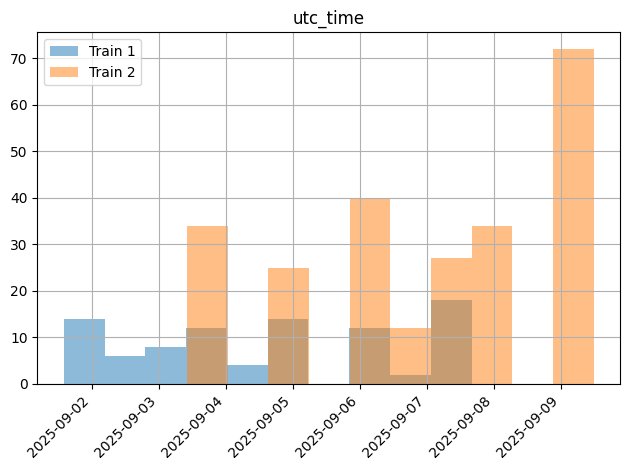

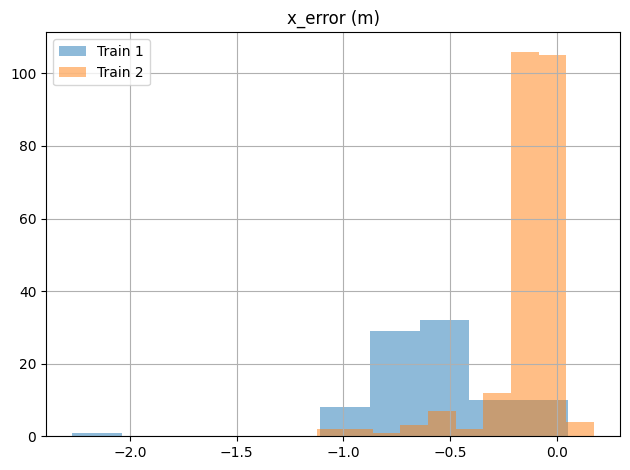

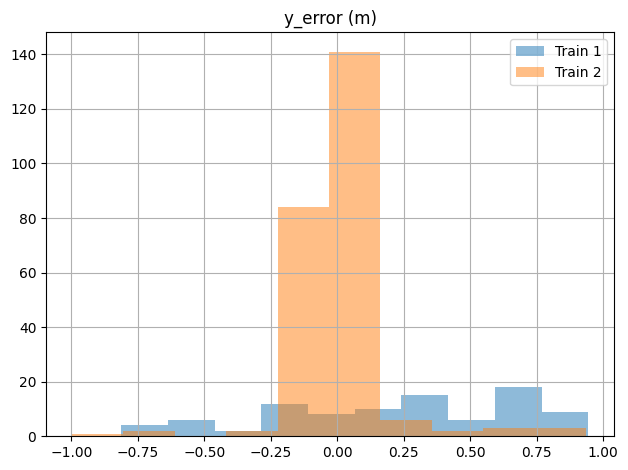

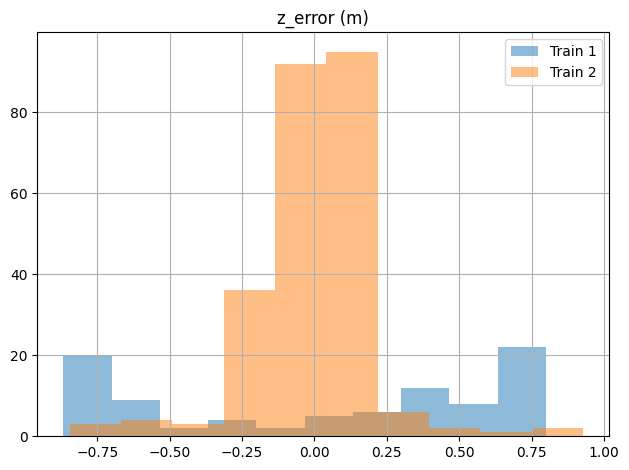

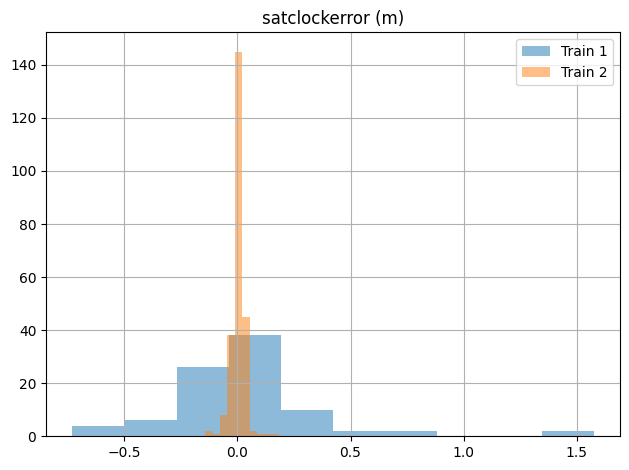

In [ ]:
fa=pd.read_csv('/content/Dataset/DATA_MEO_Train.csv',parse_dates=['utc_time'])
fb=pd.read_csv('/content/Dataset/DATA_MEO_Train2.csv',parse_dates=['utc_time'])
fa.describe()
fb.describe()
fa.rename(columns={'y_error  (m)':'y_error (m)'},inplace=True)
fb.rename(columns={'y_error (m)': 'y_error (m)'},inplace=True)
columns=['utc_time','x_error (m)','y_error (m)','z_error (m)','satclockerror (m)']
for col in columns:
  plt.figure()
  fa[col].hist(alpha=0.5,label='Train 1')
  fb[col].hist(alpha=0.5,label='Train 2')
  plt.legend()
  plt.title(col)
  if col=='utc_time':
    plt.xticks(rotation=45,ha='right')
  plt.tight_layout()
  plt.show()

Summary statistics

In [ ]:
#Summary statistics
import pandas as pd
cols=['utc_time', 'x_error (m)', 'y_error (m)', 'z_error (m)', 'satclockerror (m)']
#Computing mean and std difference
#if mean small -> similar bias
#if std diff small-> similar variability
#Both small -> same satellite behaviour
for col in cols:
  mean_a=fa[col].mean()
  mean_b=fb[col].mean()
  std_a=fa[col].std()
  std_b=fb[col].std()
  print(f"Column: {col}")
  if pd.api.types.is_datetime64_any_dtype(fa[col]):
    print(f"Train 1-> mean: {mean_a},std: {std_a}")
    print(f"Train 2-> mean: {mean_b},std: {std_b}")
    print(f"Mean difference: {abs(mean_a-mean_b)}")
    print(f"Std difference: {abs(std_a-std_b)}")
    print('\n')
  else:
    print(f"Train 1 -> mean: {mean_a:.4f},std: {std_a}")
    print(f"Train 2-> mean: {mean_b:.4f},std:{std_b}")
    print(f"Mean difference: {abs(mean_a-mean_b):.4f}")
    print(f"Std difference: {abs(std_a-std_b):.4f}")
    print('\n')

Column: utc_time
Train 1-> mean: 2025-09-04 15:53:51.333333504,std: 2 days 00:07:36.406987583
Train 2-> mean: 2025-09-06 23:47:38.360655872,std: 1 days 23:28:30.339251740
Mean difference: 2 days 07:53:47.027322368
Std difference: 0 days 00:39:06.067735843


Column: x_error (m)
Train 1 -> mean: -0.5803,std: 0.3229354327241713
Train 2-> mean: -0.1361,std:0.17380913869070294
Mean difference: 0.4442
Std difference: 0.1491


Column: y_error (m)
Train 1 -> mean: 0.2130,std: 0.4600589810396031
Train 2-> mean: 0.0107,std:0.1831446941798141
Mean difference: 0.2023
Std difference: 0.2769


Column: z_error (m)
Train 1 -> mean: 0.0231,std: 0.6168579078053794
Train 2-> mean: -0.0097,std:0.20082565848689699
Mean difference: 0.0328
Std difference: 0.4160


Column: satclockerror (m)
Train 1 -> mean: 0.0396,std: 0.3517544929758736
Train 2-> mean: 0.0009,std:0.030242439599717903
Mean difference: 0.0388
Std difference: 0.3215




**INFERENCE:**
*   Mean and Std difference is **large **
*   Train 2 errors are highly concentrated around ~0 with extremely **tight variance**
*   Train 1 errors are spread widely and are **biased**
*   Train 1 has clock drift and outliers
*   Train 2 clock error is extremely stable (huge spike at ~0)
*   Readings must have been taken under different environmental conditions

**VERDICT:**

-> Could be **different satellite data** since show different mean and spread

-> **CANNOT COMBINE** both CSV files

### Checking the Gaussianity of Residuals

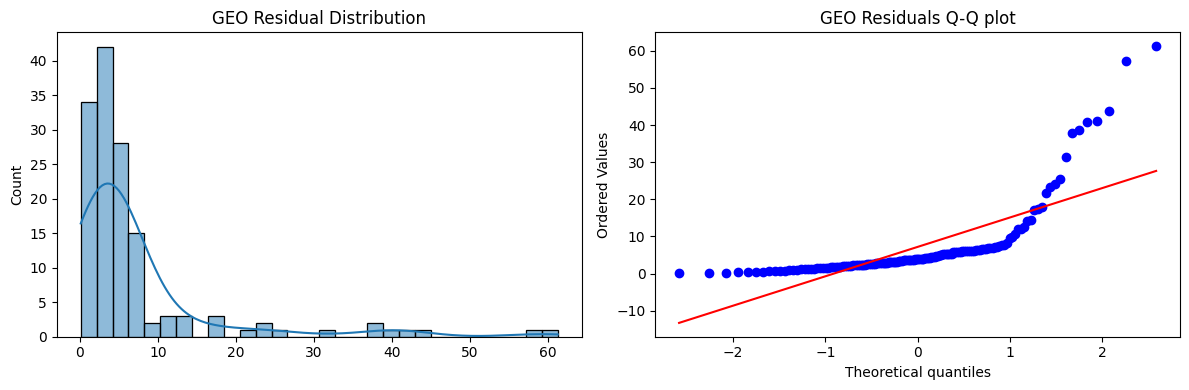

Shapiro-wilk pvalue: 0.0000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('/content/Dataset/GEOwithResiduals.csv')
residuals=df['residual'].dropna().values #dropna() removes all NaN and .values is used to convert the pandas object to numpy array
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True,bins=30) #KDE stands for Kernel Density Estimation, a probability density curve on top of histogram
#more bins -> more detail but noisier, less bins-> smoother but hide structure
plt.title('GEO Residual Distribution')
plt.subplot(1,2,2)
stats.probplot(residuals,dist='norm',plot=plt) #Quantile-Quantile plot
#dist='norm' compares residual distribution to a perfect normal distribution
#plot=plt tells in which plotting library to draw the Q-Q plot with
#x-axis is theorotical normal quantiles, y-axis is my residual quantiles, diagonal is the normal line
plt.title('GEO Residuals Q-Q plot')
plt.tight_layout()
plt.show()

shapiro_wilk_p=stats.shapiro(residuals).pvalue #stats.shapiro returns (statistic,pvalue) statistic is how close the data is to normal
#pvalue is probability that residuals come from a normal distribution
print(f"Shapiro-wilk pvalue: {shapiro_wilk_p:.4f}")

INFERENCE: pvalue<0.05 and so GEO data **REJECT Gaussianity**

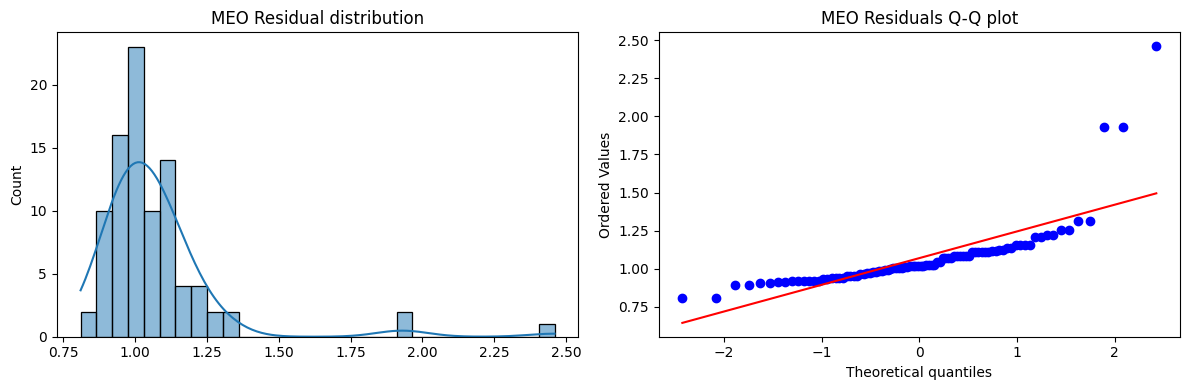

Shapiro-wilk pvalue: 0.0000


In [ ]:
df=pd.read_csv('/content/Dataset/MEOwithResiduals.csv')
residuals=df['residual'].dropna().values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True,bins=30)
plt.title('MEO Residual distribution')
plt.subplot(1,2,2)
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('MEO Residuals Q-Q plot')
plt.tight_layout()
plt.show()
shapiro_wilk_p=stats.shapiro(residuals).pvalue
print(f"Shapiro-wilk pvalue: {shapiro_wilk_p:.4f}")

INFERENCE: p<0.05 MEO **REJECT Gaussianity**

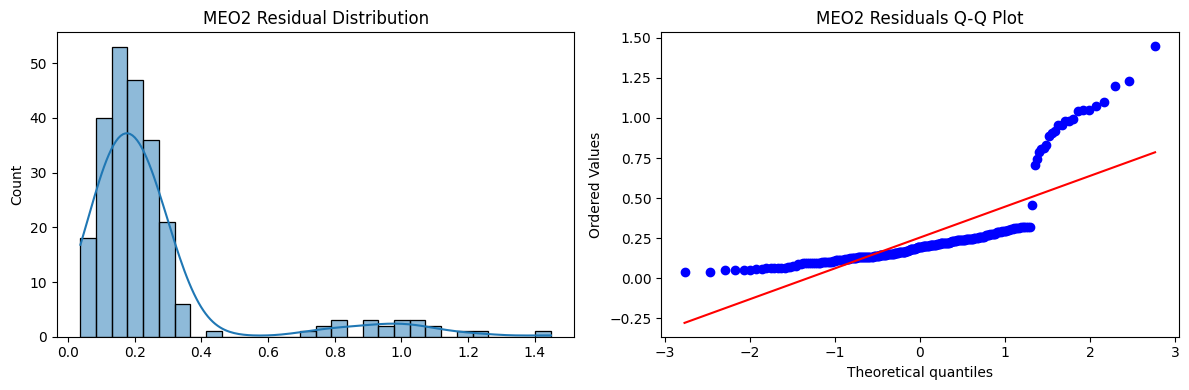

Shapiro-wilk pvalue: 0.0000


In [ ]:
df=pd.read_csv('/content/Dataset/MEO2withResiduals.csv')
residuals=df['residual'].dropna().values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True,bins=30)
plt.title('MEO2 Residual Distribution')
plt.subplot(1,2,2)
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('MEO2 Residuals Q-Q Plot')
plt.tight_layout()
plt.show()

shapiro_wilk_pvalue=stats.shapiro(residuals).pvalue
print(f"Shapiro-wilk pvalue: {shapiro_wilk_pvalue:.4f}")

INFERENCE: p<0.05 MEO2 **REJECT Gaussianity**